## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras/imdb_lstm.py at master · keras-team/keras


ConvLSTM2Dのサンプルコード


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

### SimpleRNN

In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 68s 87ms/step - loss: 0.6911 - accuracy: 0.5376 - val_loss: 0.6495 - val_accuracy: 0.5981
Epoch 2/15
782/782 [==============================] - 68s 87ms/step - loss: 0.5658 - accuracy: 0.7037 - val_loss: 0.6015 - val_accuracy: 0.7240
Epoch 3/15
782/782 [==============================] - 68s 87ms/step - loss: 0.5873 - accuracy: 0.6903 - val_loss: 0.5367 - val_accuracy: 0.7393
Epoch 4/15
782/782 [==============================] - 68s 87ms/step - loss: 0.5002 - accuracy: 0.7539 - val_loss: 0.5275 - val_accuracy: 0.7389
Epoch 5/15
782/782 [==============================] - 69s 88ms/step - loss: 0.4357 - accuracy: 0.8020 - val_loss: 0.6289 - val_accuracy: 0.7008
Epoch 6/15
782/782 [============================

### GRU

In [ ]:
from keras.layers import GRU

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 184s 236ms/step - loss: 0.4432 - accuracy: 0.7880 - val_loss: 0.3504 - val_accuracy: 0.8455
Epoch 2/15
782/782 [==============================] - 183s 234ms/step - loss: 0.2509 - accuracy: 0.8991 - val_loss: 0.3612 - val_accuracy: 0.8377
Epoch 3/15
782/782 [==============================] - 183s 233ms/step - loss: 0.1479 - accuracy: 0.9451 - val_loss: 0.4150 - val_accuracy: 0.8398
Epoch 4/15
782/782 [==============================] - 182s 232ms/step - loss: 0.0812 - accuracy: 0.9690 - val_loss: 0.5189 - val_accuracy: 0.8214
Epoch 5/15
782/782 [==============================] - 183s 234ms/step - loss: 0.0450 - accuracy: 0.9847 - val_loss: 0.6515 - val_accuracy: 0.8282
Epoch 6/15
782/782 [==================

### LSTM

In [1]:
from keras.layers import LSTM

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/15
782/782 [==============================] - 295s 377ms/step - loss: 0.4329 - accuracy: 0.7960 - val_loss: 0.3749 - val_accuracy: 0.8350
Epoch 2/15
782/782 [==============================] - 295s 377ms/step - loss: 0.2592 - accuracy: 0.8958 - val_loss: 0.3697 - val_accuracy: 0.8365
Epoch 3/15
782/782 [==============================] - 296s 379ms/step - loss: 0.1681 - accuracy: 0.9359 - val_loss: 0.4349 - val_accuracy: 0.8262
Epoch 4/15
782/782 [==============================] - 294s 376ms/step - loss: 0.1140 - accuracy: 0.9587 - val_loss: 0.5555 - val_accuracy: 0.8206
Epoch 5/15
782/782 [==============================] - 290s 370ms/step - loss: 0.0767 - accuracy: 0.9726 - val_loss: 0.6111 - val_accuracy: 0.8181
Epoch 6/15
782/782 [==================

#### Test accuracy
- SimpleRNN: 0.7797200083732605
- GRU: 0.8133599758148193
- LSTM: 0.8098800182342529

SimpleRNNは精度は低いが計算速度は早い。<br>
GRUは精度も良く計算速度もそこそこ早い。<br>
LSTMは精度は良いが計算速度が遅い。<br>

### ConvLSTM2D

Epoch 1/300
95/95 [==============================] - 33s 350ms/step - loss: 0.7779 - val_loss: 0.7401
Epoch 2/300
95/95 [==============================] - 32s 341ms/step - loss: 0.7369 - val_loss: 0.7837
Epoch 3/300
95/95 [==============================] - 32s 341ms/step - loss: 0.7060 - val_loss: 0.7866
Epoch 4/300
95/95 [==============================] - 32s 341ms/step - loss: 0.6813 - val_loss: 0.7360
Epoch 5/300
95/95 [==============================] - 32s 341ms/step - loss: 0.6603 - val_loss: 0.6780
Epoch 6/300
95/95 [==============================] - 32s 341ms/step - loss: 0.6418 - val_loss: 0.6565
Epoch 7/300
95/95 [==============================] - 32s 341ms/step - loss: 0.6253 - val_loss: 0.6381
Epoch 8/300
95/95 [==============================] - 32s 341ms/step - loss: 0.6096 - val_loss: 0.6208
Epoch 9/300
95/95 [==============================] - 32s 342ms/step - loss: 0.5950 - val_loss: 0.6059
Epoch 10/300
95/95 [==============================] - 32s 341ms/step - loss: 0.580

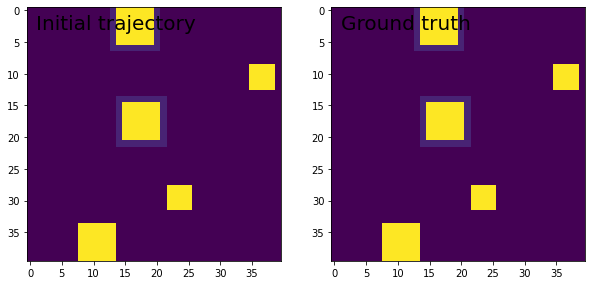

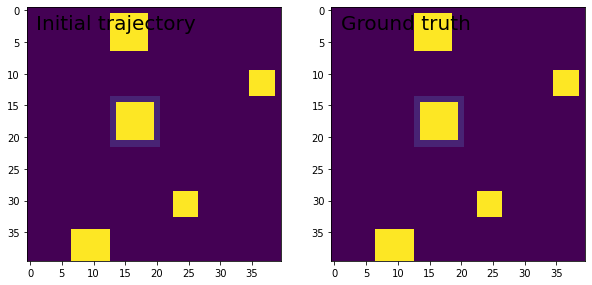

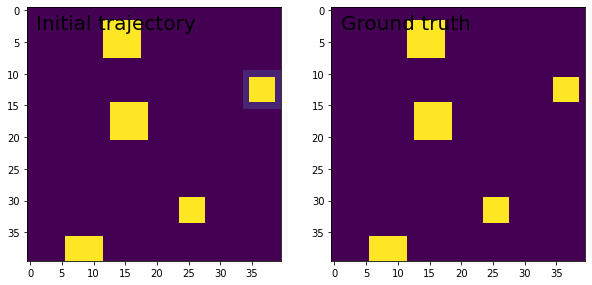

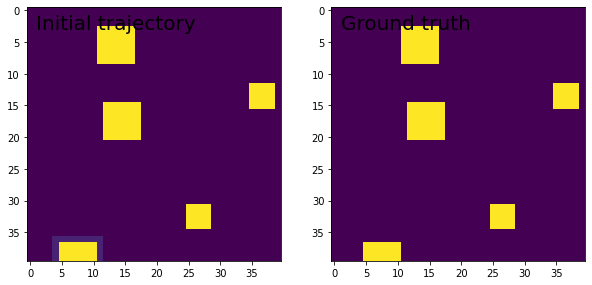

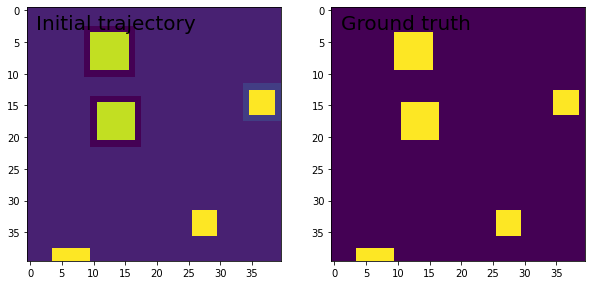

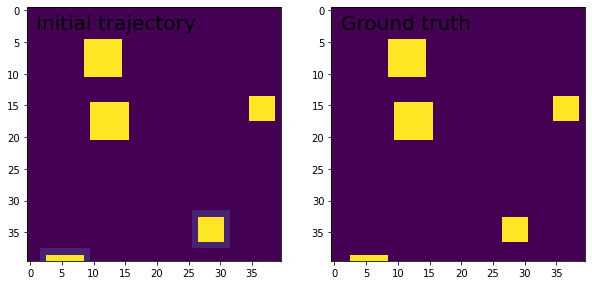

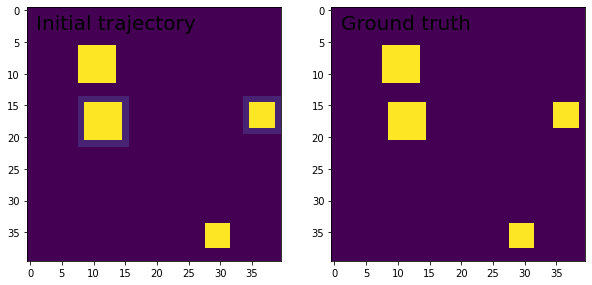

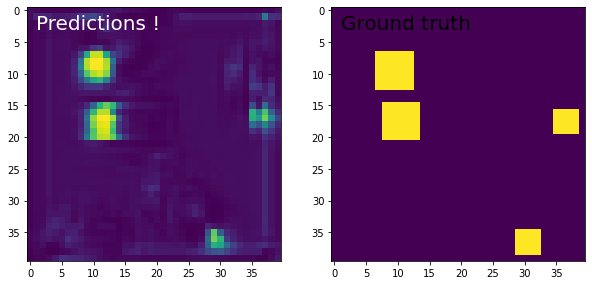

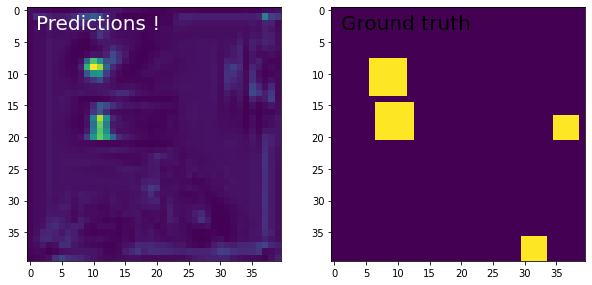

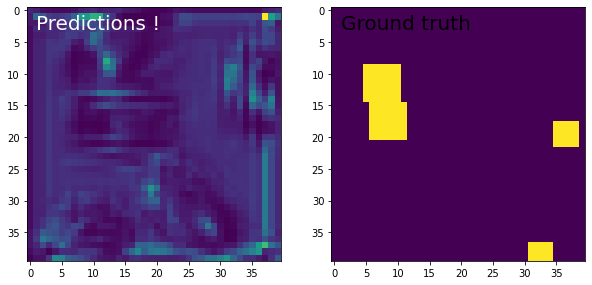

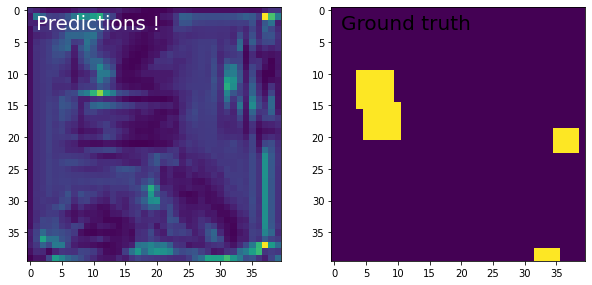

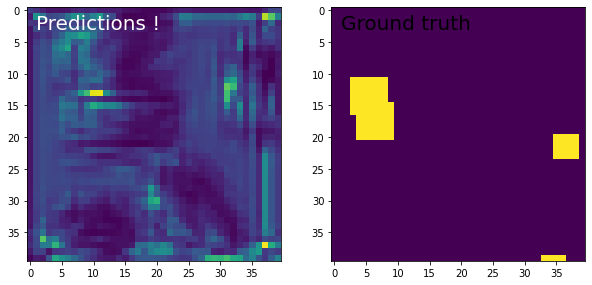

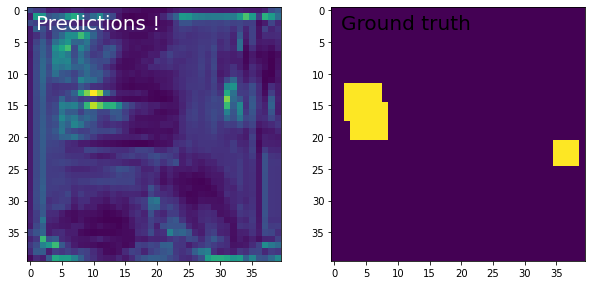

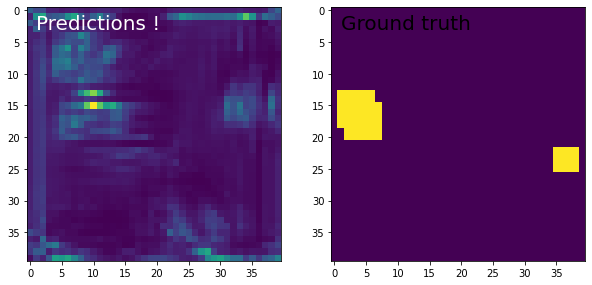

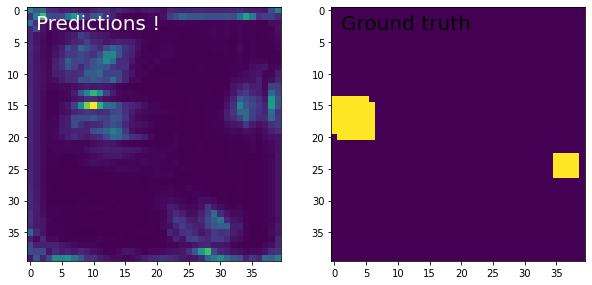

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=300, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


データセット - Keras Documentation


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

### 回答無し

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

### ・RNN
　　Recurrentレイヤーに対する基底クラス。入力シーケンスのバッチ全体を処理する。

### ・SimpleRNNCell、GRUCell、LSTMCell
　　入力シーケンスのバッチ全体を処理するRNNレイヤーとは異なり、RNN・GRU・LSTM　Cellは単一のタイムステップのみを処理する。(例：RNN(LSTMCell(10)) と LSTM (10) は等価 )

### ・StackedRNNCells
　　RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。<br>
　　効率的なstacked RNNを実装するために使われる。

### ・CuDNNGRU、CuDNNLSTM
　　CuDNNを利用した高速な実装。<br>
　　TensorFlowバックエンドでGPU上でのみ動作する。<br>
　　CuDNNはNVIDIAが公開しているDeep Learning用のライブラリである。<br>


※CuDNN: Efficient Primitives for Deep Learningによれば、CuDNNのConvolutionの基本はlowering(=im2col)である。しかし、loweringをそのまま実装すると、メモリ消費量の問題がある。そこで、CuDNNはタイリングとloweringを組み合わせてconvolutionの実装としている。

入力画像をいくつかのタイルに分割してからConvolutionを行うことには、以下の様な利点がある。

- メモリ消費量を削減できる。
- タイルを作っている間に積和計算を実行できる。
- タイルにした方がキャッシュにも乗りやすくなる？

どういうタイルサイズに分割すればいいかは自明な問題ではないが、その辺りがどうなっているかは上記の論文には書いていない。